[![View filled on Github](https://img.shields.io/static/v1.svg?logo=github&label=Repo&message=View%20On%20Github&color=lightgrey)](https://github.com/timpdotd/LabIAGI_1950722/tree/408d4077a2ed2906ba3a3145586fc761e9f4380e/Esercitazione_6)
[![Open filled In Collab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1yADTeLVYA4NqWBowl3FWhQYc-B9TPm47?usp=sharing)

# Esercizio 2
In questo esercizio utilizzerete il dataset Heart Disease per costruire un modello in grado di predire se un paziente ha o meno una malattia cardiaca. Il dataset è composto da 303 pazienti, ognuno dei quali è descritto da 13 attributi. L'attributo target è un valore intero che va da 0 (assenza) a 4.

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import GridSearchCV, StratifiedKFold, learning_curve, train_test_split
import time
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Caricamento del dataset

Attributes:
* Age
* Sex:
    * Male -> 1
    * Female -> 0
* Chest Pain Type:
    * angina -> 1
    * abnang -> 2
    * notang -> 3
    * asympt -> 4
* Resting Blood Pressure
* Cholesterol
* Fasting Blood Sugar:
    * < 120 -> 1
    * \>= 120 -> 0
* Resting ECG:
    * norm -> 0
    * abn -> 1
    * hyper -> 2
* Max Heart Rate
* Exercise Induced Angina:
    * yes -> 1
    * no -> 0
* Oldpeak
* Slope:
    * up -> 1
    * flat -> 2
    * down -> 3
* Number of vessels colored
* Thal:
    * norm -> 3
    * fixed -> 6
    * rever -> 7
* Target:
    * 0 -> no disease
    * 1,2,3,4 -> disease



In [ ]:
cols = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','target']
xcols = cols[0:-1]
ycol = cols[-1]
url = 'https://raw.githubusercontent.com/timpdotd/LabIAGI_1950722/main/Esercitazione_6/data/processed.cleveland.data'
df = pd.read_csv(url, header=None, index_col=None, names=cols, na_values=['?'])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [ ]:
df = df.dropna()

In [ ]:
X = df[xcols]
m, n = X.shape

# Binarize the target
y = (df[ycol] > 0).astype(int)

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Normalize the data
normalize = True

if normalize:
    xmean = X_train.mean()
    xstd = X_train.std()
    # Note that we use the mean and std of the training set to normalize both the training and test sets
    X_train = (X_train - xmean)/xstd
    X_test = (X_test - xmean)/xstd

### Define the model

In [ ]:
# Define logistic regression model
model = LogisticRegression(solver='lbfgs', n_jobs=-1)

### Grid Search

In [ ]:
# Define scorer
scorer = make_scorer(accuracy_score)

# Define grid search parameters
grid = dict()
grid['C'] = np.logspace(-6, 3, 10)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring=scorer, error_score=0)

In [ ]:
# Perform grid search
start = time.time()
grid_result = grid_search.fit(X_train, y_train)
end = time.time()
print('Grid search time =', end - start)

Grid search time = 2.271099090576172


In [ ]:
# Summarize results
print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('%f (%f) with: %r' % (mean, stdev, param))

Best: 0.822961 using {'C': 0.1}
0.523227 (0.008011) with: {'C': 1e-06}
0.523227 (0.008011) with: {'C': 1e-05}
0.523227 (0.008011) with: {'C': 0.0001}
0.801773 (0.015547) with: {'C': 0.001}
0.818617 (0.041322) with: {'C': 0.01}
0.822961 (0.057372) with: {'C': 0.1}
0.822961 (0.057372) with: {'C': 1.0}
0.818794 (0.060182) with: {'C': 10.0}
0.818794 (0.060182) with: {'C': 100.0}
0.818794 (0.060182) with: {'C': 1000.0}


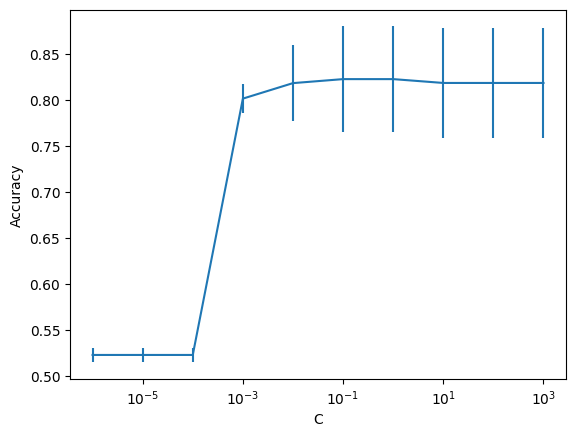

In [ ]:
# Plot grid search results
plt.errorbar(grid['C'], means, yerr=stds)
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
# Define logistic regression model with best parameters
model = LogisticRegression(solver='lbfgs', n_jobs=-1, C=grid_result.best_params_['C'])

### Learning Curves

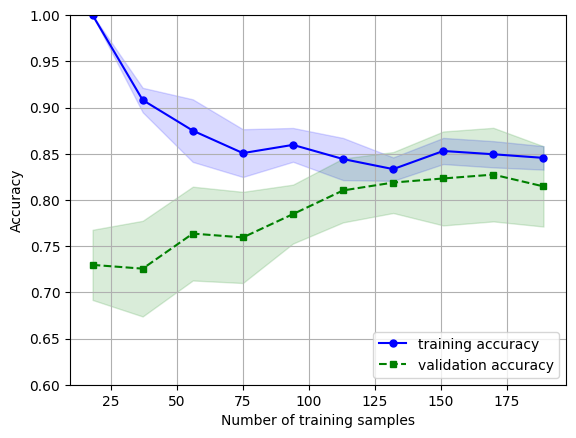

In [ ]:
# Plot learning curve
scorer = make_scorer(accuracy_score)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
train_sizes, train_scores, test_scores = learning_curve(
    model, X_train, y_train, cv=cv, scoring=scorer, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.6, 1.0])
plt.show()

### Train

In [ ]:
# Fit model on all training data
model.fit(X_train, y_train)

LogisticRegression(C=0.1, n_jobs=-1)

### Test

In [ ]:
# Predict on test set
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Test accuracy =', accuracy)

Test accuracy = 0.9


### Plot model coefficients

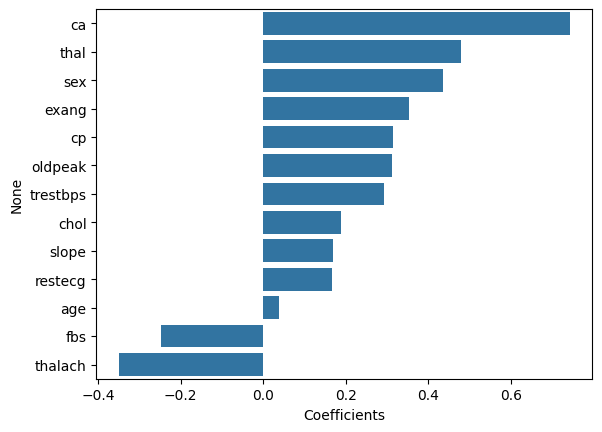

In [ ]:
# Plot model coefficients
coeffs = pd.DataFrame(model.coef_, columns=xcols)
coeffs = coeffs.transpose()
coeffs.columns = ['Coefficients']
coeffs = coeffs.sort_values(by='Coefficients', ascending=False)
sns.barplot(x=coeffs['Coefficients'], y=coeffs.index)
plt.show()


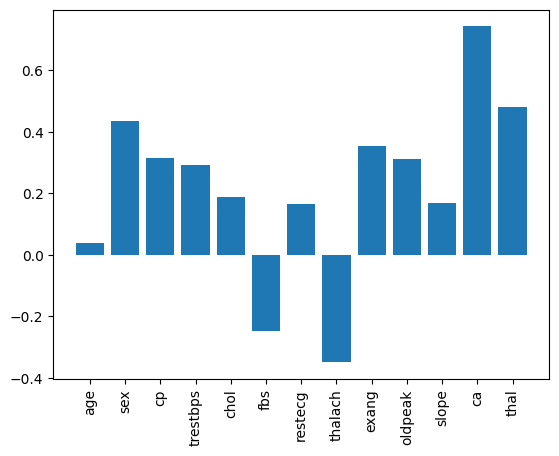

In [ ]:
# Plot model coefficients without using only matplotlib
plt.bar(range(n), model.coef_[0])
plt.xticks(range(n), xcols, rotation=90)
plt.show()

# Task: Ripetete l'analisi e l'addestramento sul dataset YearPredictionMSD:

Il dataset Year Prediction MSD si puà scaricare da questo link: https://archive.ics.uci.edu/ml/datasets/YearPredictionMSD

![YPMSD](https://github.com/Sapienza-AI-Lab/esercitazione6-22-23/blob/main/data/ypmsd.jpg?raw=1)
- **Nota 1:** Il dataset è molto grande. Per testare la procedura di analisi e la correttezza del codice, prima
provate su un sottoinsieme dei dati.
- **Nota 2:** Il problema può essere trattato come un problema di classificazione o di regressione. Voi iniziate a risolverlo come classificazione, poi, se volete, potete provare a risolverlo come regressione.


**Dataset Characteristics**
___
Multivariate

Subject Area: Other

Associated Tasks: Regression

Feature Type: Real

Instances:
515345

Features: 90 attributes, 12 = timbre average, 78 = timbre covariance
The first value is the year (target), ranging from 1922 to 2011.
Features extracted from the 'timbre' features from The Echo Nest API.
We take the average and covariance over all 'segments', each segment
being described by a 12-dimensional timbre vector.

**Dataset Information**
___
Prediction of the release year of a song from audio features. Songs are mostly western, commercial tracks ranging from 1922 to 2011, with a peak in the year 2000s.

You should respect the following train / test split:
train: first 463,715 examples
test: last 51,630 examples
It avoids the 'producer effect' by making sure no song
from a given artist ends up in both the train and test set.

Has Missing Values? No




### Loading the dataset

In [7]:
url = 'https://media.githubusercontent.com/media/timpdotd/LabIAGI_1950722/main/Esercitazione_6/data/YearPredictionMSD.txt'

features = ['year', 't1', 't2', 't3', 't4', 't5', 't6', 't7', 't8', 't9', 't10',
            't11', 't12', 't13', 't14', 't15', 't16', 't17', 't18', 't1 9', 't20',
            't21', 't22', 't23', 't24', 't25', 't26', 't27', 't28', 't29', 't30',
            't31', 't32', 't33', 't34', 't35', 't36 ', 't37', 't38', 't39', 't40',
            't41', 't42', 't43', 't44', 't45', 't46', 't47', 't48', 't49', 't50',
            't51', 't52', 't53' , 't54', 't55', 't56', 't57', 't58', 't59', 't60',
            't61', 't62', 't63', 't64', 't65', 't66', 't67', 't68', 't69', 't70',
            't71', 't72', 't73', 't74', 't75', 't76', 't77', 't78', 't79', 't80',
            't81', 't82', 't83', 't84', 't85', 't86', 't87', 't88', 't89', 't90']
df = pd.read_csv(url, names=features)

nb_classes = 2011 - 1922 # Number of classes
df.describe()

,year,t1,t2,t3,t4,t5,t6,t7,t8,t9,...,t81,t82,t83,t84,t85,t86,t87,t88,t89,t90
count,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,...,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000
mean,1998.397082,43.387126,1.289554,8.658347,1.164124,-6.553601,-9.521975,-2.391089,-1.793236,3.727876,...,15.755406,-73.461500,41.542422,37.934119,0.315751,17.669213,-26.315336,4.458641,20.035136,1.329105
std,10.931046,6.067558,51.580351,35.268585,16.322790,22.860785,12.857751,14.571873,7.963827,10.582861,...,32.099635,175.618889,122.228799,95.050631,16.161764,114.427905,173.977336,13.346557,185.558247,22.088576
min,1922.000000,1.749000,-337.092500,-301.005060,-154.183580,-181.953370,-81.794290,-188.214000,-72.503850,-126.479040,...,-437.722030,-4402.376440,-1810.689190,-3098.350310,-341.789120,-3168.924570,-4319.992320,-236.039260,-7458.378150,-381.424430
25%,1994.000000,39.954690,-26.059520,-11.462710,-8.487500,-20.666450,-18.440990,-10.780600,-6.468420,-2.293660,...,-1.812650,-139.555160,-20.986900,-4.669540,-6.781590,-31.580610,-101.530300,-2.566090,-59.509270,-8.820210
50%,2002.000000,44.258500,8.417850,10.476320,-0.652840,-6.007770,-11.188390,-2.046670,-1.736450,3.822310,...,9.171850,-53.090060,28.791060,33.623630,0.820840,15.598470,-21.204120,3.117640,7.759730,0.053050
75%,2006.000000,47.833890,36.124010,29.764820,8.787540,7.741870,-2.388960,6.508580,2.913450,9.961820,...,26.274480,13.478730,89.661770,77.785800,8.470990,67.794960,52.389330,9.967740,86.351610,9.679520
max,2011.000000,61.970140,384.065730,322.851430,335.771820,262.068870,166.236890,172.402680,126.741270,146.297950,...,840.973380,4469.454870,3210.701700,1734.079690,260.544900,3662.065650,2833.608950,463.419500,7393.398440,677.899630


In [6]:
df.shape

(515344, 91)

In [8]:
df.head()

,year,t1,t2,t3,t4,t5,t6,t7,t8,t9,...,t81,t82,t83,t84,t85,t86,t87,t88,t89,t90
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903
